# Hedge Trading

 지난 두 번의 강의에서 몬테카를로 시뮬레이션과 유한차분법을 이용한 파생상품의 가격 결정을 진행하였습니다.
이번 강의에서는 해당 기술을 사용하여, 파생상품의 가격의 민감도를 산출하고 헤지 트레이딩을 실시합니다.

## 1. 헤지 트레이딩의 정의

헤지 트레이딩이란, 파생상품을 포함한 포트폴리오에 투자하고 있는 투자자가 자산들의 가격 변동으로 인한 포트폴리오의 수익률 하락을 방지하기 위해 자산들을 매매하는 과정을 의미합니다.<br>
그 예시로는, ELS를 발행한 증권사가 ELS의 가치 변동으로 인한 원금북 손실을 방지하기 위해 기초자산인 지수나 주식을 매매하는 과정이 있습니다. <br>
이번 강의에서는 가장 기초적인 헤지 트레이딩인 델타 헤징(Delta Hedging)을 구현합니다. <br>

### 1-1 델타 헤징의 정의

델타 헤징이란 파생상품의 가격의 민감도를 나타내는 그릭스(Greeks) 중 하나인 델타를 이용한 헤지 트레이딩 과정입니다. 그릭스의 예시는 다음과 같습니다. <br>

$$\Delta = {dV\over dS}$$ 

$$\Gamma = {d^2V\over dS^2}$$

$$\theta = {dV \over dt}$$

델타는 이 중 첫 번째 그릭스로, 파생상품의 가격 $V$를 기초자산의 가격 $S$로 미분한 것을 의미합니다.<br>

테일러 급수를 이용하여 파생상품의 가격 $V(S,t)$의 변화인 $dV$를 나타내면 다음과 같습니다. <br>

$$dV = {dV\over dS} dS + {1\over 2}{d^2V\over dS^2} {dS}^2 + {dV \over dt} dt + \cdots$$

이제 이토의 보조정리 (Ito's lemma)를 이용하면 위 식은 다음과 변형됩니다. <br>

$$dV = {dV\over dS} dS + {1\over 2}{d^2V\over dS^2} dt + {dV \over dt} dt$$

그릭스를 사용하면 위 식은 다음과 같이 나타낼 수 있습니다. <br>

$$dV = \Delta dS + {1\over 2}\Gamma dt + \theta dt$$

위 식에서 불확실한 과정, 즉 확률과정은 $dS$입니다. 즉, $dS$를 제거할 수 있다면, $dt$가 아주 작을 때, 우리는 포트폴리오 가격의 변동을 제거할 수 있을 것입니다.<br>

이제 $V$의 가격을 가지는 파생상품을 매도하고, 동시에 이 파생상품의 델타만큼의 기초자산을 매수한 포트폴리오의 가치를 $Y$로 설정합니다. 그러면 $Y$는 다음과 같이 나타낼 수 있습니다.

$$Y = -V+\Delta S$$

해당 포트폴리오의 가치 변화 $dY$는 다음과 같습니다.<br>

$$dY = -dV + \Delta dS$$

위의 식을 이용하면 이는 다음과 같이 변형됩니다. <br>

$$dY =  -\Delta dS - {1\over 2}\Gamma dt - \theta dt + \Delta dS = - {1\over 2}\Gamma dt - \theta dt$$

이는 $dY$가 충분히 짧은 시간 $dt$에 한해 0으로, 이 포트폴리오는 짧은 시간 $dt$ 동안 확률과정으로 인해 가치가 변하지 않는 것을 의미합니다. <br>
즉 어떤 파생상품을 매도/매수 하고 해당 파생상품의 델타만큼 기초자산을 매수/매도 하면 기초자산의 가격변동으로 인한 포트폴리오의 가치 변동을 막을 수 있으며, 시간과 주가에 따라 델타가 변할 때, 그에 따라 포트폴리오의 기초자산의 투입 주수를 조절하는 것을 델타 헤징이라고 합니다.<br>
이번 강의에서는 이러한 델타 헤징을 구현합니다.

## 2. 그릭스 계산

헤지 트레이딩을 진행하기 위해서는 그릭스를 계산해야 합니다. 이번 강의에서는 델타 헤징을 시행하기 때문에 델타를 계산해야 합니다. <br>

바닐라 옵션이나, 잘 알려진 이색옵션의 경우 Closed-Form Solution이 있기에, 델타 역시 Closed-Form Solution이 존재하나, 지금은 Closed-Form Solution을 모른다고 가정하고, 이전 강의에서 공부한 방법론을 이용하여 델타를 구합니다. <br>

몬테카를로 시뮬레이션과 유한차분법을 이용하여 그릭스를 계산하는 방법은, 유한차분법에서 사용한 미분의 근사를 이용하는 것입니다.<br>

For small $h$,
$$\Delta = {dV(S,t)\over dS} \approx {V(S+dS,t)-V(S-dS,t)\over 2dS}$$
<br>
즉 몬테카를로 시뮬레이션을 이용하여 델타를 구하려면, 우선 기초자산의 가격을 $S+dS$로 설정한 뒤 파생상품의 가격을 구하고, 그 후 기초자산의 가격을 $S-dS$로 설정한 뒤 파생상품의 가격을 구해 두 가격의 차이를 $2dS$로 나눠주면 됩니다.<br>

이 때, 난수의 분포에 따라 오차가 발생할 수 있으니 난수를 고정한 뒤 파생상품의 가격을 결정하는 과정을 따라야 합니다. <br>

유한차분법을 이용하여 델타를 구하는 것은 몬테카를로 시뮬레이션의 경우보다 간단합니다.<br>

유한차분법을 실시하여 모든 격자점에서의 파생상품의 가격을 구했다면, $V(S+dS,t)$과 $V(S-dS,t)$ 역시 알고 있는 값이기 때문에 해당 값들을 위 식에 대입하여 델타를 구하면 됩니다.<br>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import numpy
from scipy.stats import norm
N = norm.cdf

def DeltaBS(S, K, T, r, q, sigma):
    if T == 0:
        if S>K:
            return 1
        else:
            return 0
    else:
        d1 = (np.log(S / (K) + (r - q + ( 0.5) * sigma ** 2) * T)) / (sigma * np.sqrt(T))
        d2 = d1 -  sigma * np.sqrt(T)
        return  N(d1)    
def a(S,t,dS,dt,r,sigma) :
    a1 = 0.5*((sigma*S)/dS)**2
    a2 = 0.5*r*S/dS
    return -a1-a2
def b(S,t,dS,dt,r,sigma) :
    b1 = ((sigma*S)/dS)**2
    return r + b1
def c(S,t,dS,dt,r,sigma) :
    c1 = 0.5*((sigma*S)/dS)**2
    c2 = 0.5*r*S/dS
    return -c1+c2
def ai(S,t,dS,dt,r,sigma) :
    return a(S,t,dS,dt,r,sigma) * dt
def bi(S,t,dS,dt,r,sigma) :
    return b(S,t,dS,dt,r,sigma) * dt +1
def ci(S,t,dS,dt,r,sigma) :
    return c(S,t,dS,dt,r,sigma) * dt
def matrix(Smax,t,dS,dt,r,sigma):
    N = int(Smax/dS)
    mat = np.zeros([N,N])
    mat[0,0] = 2*ci(dS,t,dS,dt,r,sigma)+bi(dS,t,dS,dt,r,sigma)
    mat[0,1] = -ci(dS,t,dS,dt,r,sigma)+ai(dS,t,dS,dt,r,sigma)
    for i in range(1,N-1):
        mat[i,i-1] = ci((i+1)*dS,t,dS,dt,r,sigma)
        mat[i,i] = bi((i+1)*dS,t,dS,dt,r,sigma)
        mat[i,i+1] = ai((i+1)*dS,t,dS,dt,r,sigma)
    mat[N-1,N-2] = ci(Smax,t,dS,dt,r,sigma)-ai(Smax,t,dS,dt,r,sigma)
    mat[N-1,N-1] = bi(Smax,t,dS,dt,r,sigma)+2*ai(Smax,t,dS,dt,r,sigma)
    return mat


### 2-1 Monte Carlo Simulation을 이용한 델타 계산

In [2]:
s0 = 100
K = 100
q = 0
r = 0.02
sigma = 0.2
T = 1
days = 250
nsimulation = 10000
dt = 1/250
dS = 1

우선 난수를 생성합니다.

In [3]:
Normal = np.random.normal(size=(T*days, nsimulation))

이제 이 난수를 이용하여, 초기의 기초자산의 가격이 $S_0+dS = 101$일 때의 콜옵션의 가격을 구합니다.

In [4]:
path1 = np.zeros((T*days+1,nsimulation))
path1[0] = s0+1
logds = r*dt + Normal * sigma*np.sqrt(dt)
for i in range(1,T*days+1):
    path1[i] = path1[i-1]*(1+logds[i-1])
c0 = np.mean(np.maximum(path1[-1]-100,0))*np.exp(-r*T)

또 같은 난수를 이용하여, 초기의 기초자산의 가격이 $S_0-dS = 99$일 때의 콜옵션의 가격을 구합니다.<br>

In [5]:
path2 = np.zeros((T*days+1,nsimulation))
path2[0] = s0-1
logds = r*dt + Normal * sigma*np.sqrt(dt)
for i in range(1,T*days+1):
    path2[i] = path2[i-1]*(1+logds[i-1])
c1 = np.mean(np.maximum(path2[-1]-100,0))*np.exp(-r*T)

이제 이 두 가격의 차이를 $2dS$로 나누면, 델타를 구할 수 있습니다.

In [6]:
(c0-c1)/2

0.5778840664341445

이는 Closed-Form Solution을 이용하여 구한 델타와 비슷한 것을 볼 수 있습니다.

In [7]:
DeltaBS(s0, K, T, r, q, sigma)

0.5777354473141183

### 2-2 Finite Difference Method를 이용한 델타 계산

유한차분법의 경우, 격자점을 완성하면 바로 델타를 구할 수 있습니다.<br>
이후 델타헤징을 위해, $S_{max}$를 조금 크게 잡습니다.

In [8]:
mean = np.exp(r+0.5*sigma**2)
var = (np.exp(sigma**2)-1)*(np.exp(2*r+sigma**2))
Smax = np.ceil(mean+5*np.sqrt(var))*100
call = pd.DataFrame(index = np.arange(dS,Smax+dS,dS), columns = range(1,252))
for i in call.index:
    call.loc[i,251] = np.maximum(i-K,0)
for i in range(1,251):
    t = (251-i)/250
    v = np.array(call[251-i+1])
    call[251-i] = np.linalg.inv(matrix(Smax,t,dS,dt,r,sigma))@v

이제 격자점에서 $V(S+dS,t)$와 $V(S-dS,t)$에 해당하는 값을 찾아, 차를 구하고 $2dS$로 나누면 됩니다.<br>

In [9]:
(call.loc[101,1]-call.loc[99,1])/2

0.5791700597504468

이를 통해 구한 델타 역시, Closed-Form Solution을 이용하여 구한 델타와 비슷한 것을 볼 수 있습니다.

In [10]:
DeltaBS(s0, K, T, r, q, sigma)

0.5777354473141183

### 2-3 MC와 FDM의 비교

MC와 FDM 중 사용할 방법론을 정하기 위해, Closed-Form Solution과 각 방법으로 도출한 바닐라 콜옵션의 델타를 비교합니다.

In [11]:
Comparison = pd.DataFrame(index = ["Exact","MC","FDM"], columns = range(95,106))

In [12]:
Normal = np.random.normal(size=(T*days, nsimulation))
for i in range(95,106):
    Comparison.loc["Exact",i] = DeltaBS(i, K, T, r, q, sigma)
    pathu = np.zeros((T*days+1,nsimulation))
    pathu[0] = i+1
    logds = r*dt + Normal * sigma*np.sqrt(dt)
    for j in range(1,T*days+1):
        pathu[j] = pathu[j-1]*(1+logds[j-1])
    cu = np.mean(np.maximum(pathu[-1]-100,0))*np.exp(-r*T)
    pathd = np.zeros((T*days+1,nsimulation))
    pathd[0] = i-1
    logds = r*dt + Normal * sigma*np.sqrt(dt)
    for j in range(1,T*days+1):
        pathd[j] = pathd[j-1]*(1+logds[j-1])
    cd = np.mean(np.maximum(pathd[-1]-100,0))*np.exp(-r*T) 
    Comparison.loc["MC",i] = (cu-cd)/2
    Comparison.loc["FDM",i] = (call.loc[i+1,1]-call.loc[i-1,1])/2

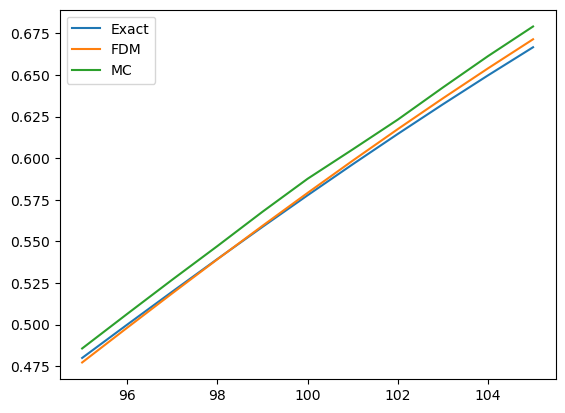

In [13]:
plt.plot(range(95,106),Comparison.loc["Exact"], label = "Exact")
plt.plot(range(95,106),Comparison.loc["FDM"], label = "FDM")
plt.plot(range(95,106),Comparison.loc["MC"], label = "MC")
plt.legend(loc = "upper left")
plt.show()

미세하게 FDM의 정확도가 높고, 또 FDM은 난수에 따른 오차를 걱정할 일이 없으니 FDM을 이용해 델타를 계산합니다.

## 3. 바닐라 콜옵션의 델타헤징

델타 헤징을 시행하기 전, 격자점 사이에서의 파생상품의 가치를 정의해야 합니다.예를 들어 $dS=1$일 경우 모든 격자점에서의 기초자산의 가격은 정수로 나타나는데, 기초자산의 가격 $S$가 50.75와 같이 정수가 아닌 수가 될 수도 있기 때문에 이러한 경우에서의 파생상품의 가치를 정의해야 합니다. 즉 $S$축 방향으로 파생상품의 가치라는 함숫값을 보간해야 합니다.<br>
이번 강의에서는 보간하는 방법으로 선형 보간을 선택합니다. 즉, 격자점 사이를 선분으로 이어 $S$가 정수가 아닐 경우의 함숫값을 설정합니다.<br>
예를 들어 $S = 50.75$ 일 경우,$V(S,t) = (1-0.75)\times V(50,t) + 0.75\times V(51,t)$로 정의됩니다.<br>
우선 격자점이 주어졌을 때, 이러한 계산을 실행하는 함수를 만듭니다.

In [14]:
def linear(df,S,dS,t):
    if S%dS ==0:
        return df.loc[S,t]
    else:
        k = (S%dS)/dS
        Sd = np.max(df.index[df.index<S])
        Su = Sd+dS
        return (1-k)*df.loc[Sd,t]+k*df.loc[Su,t]

그리고 델타 계산의 편의를 위해 격자 $V(S+dS,t)$와 $V(S-dS,t)$를 각각 만들어 델타 값을 함숫값으로 가지는 격자를 생성합니다.

In [15]:
delta = (call.shift(-1)-call.shift(1))/2

이제 바닐라 콜옵션을 매도하고, $\Delta$주의 기초자산을 매수하는 델타헤징의 성과를 분석하기 위해 주가 시나리오를 제작합니다.

In [16]:
Normalh = np.random.normal(size=(T*days, 1000))
path = np.zeros((T*days+1,1000))
path[0] = s0
logds = r*dt + Normalh * sigma*np.sqrt(dt)
for i in range(1,T*days+1):
    path[i] = path[i-1]*(1+logds[i-1])

이제 성과를 분석하기 위해 일일 잔고 데이터프레임과 일일 손익 데이터프레임을 생성합니다.

In [17]:
PnL = pd.DataFrame(index = range(1,1001), columns = range(1,252))
Balance = pd.DataFrame(index = range(1,1001), columns = range(1,252))

일일 손익은 전일 평가금액과 금일 평가금액의 차이이므로 첫날의 일일 손익은 0입니다.<br>
그리고 첫날 바닐라 콜옵션을 매도하였기 때문에 첫날의 잔고는 일괄적으로 바닐라콜옵션의 가격입니다.

In [18]:
PnL[1] = 0
Balance[1] = call.loc[100,1]

일일 손익은 다음과 같이 계산됩니다.
$$PnL = Y(S+dS,t-dt)-Y(S,t) = -(V(S+dS,t-dt)-V(S,t))+\Delta dS$$
이때 델타는 $t$시점에서의 델타입니다.
이를 활용해 손익 데이터프레임을 완성합니다.

In [19]:
for i in range(1,1001):
    for j in range(2,252):
        S0 = path[j-2,i-1]
        S1 = path[j-1,i-1]
        PnL.loc[i,j] = -linear(call,S1,dS,j)+linear(call,S0,dS,j-1) + linear(delta,S0,dS,j-1)*(S1-S0)

일일 잔고는 전일 잔고에 금일 손익을 더해 계산됩니다. 이를 활용해 잔고 데이터프레임도 완성합니다.

In [20]:
for i in range(1,1001):
    for j in range(2,252):
        Balance.loc[i,j] = Balance.loc[i,j-1]+PnL.loc[i,j]

이제 성과 분석을 위해 각 날짜별 일일손익 최댓값과 최솟값, 평균값을 그래프로 그려 확인합니다.

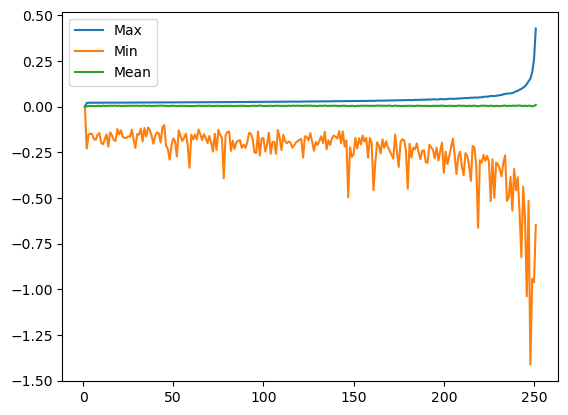

In [21]:
plt.plot(PnL.max(),label = "Max")
plt.plot(PnL.min(),label = "Min")
plt.plot(PnL.mean(),label = "Mean")
plt.legend(loc = "upper left")
plt.show()

하지만 이 그래프만으로는 델타 헤징의 성과를 체감하기가 힘듭니다. 그래서 델타헤징을 하지 않고, 콜옵션을 매도만 했을 때의 일일 손익도 구해서 비교를 하겠습니다.

In [22]:
PnL2 = pd.DataFrame(index = range(1,1001), columns = range(1,252))
Balance2 = pd.DataFrame(index = range(1,1001), columns = range(1,252))
PnL2[1] = 0
Balance2[1] = call.loc[100,1]
for i in range(1,1001):
    for j in range(2,252):
        S0 = path[j-2,i-1]
        S1 = path[j-1,i-1]
        PnL2.loc[i,j] = -linear(call,S1,dS,j)+linear(call,S0,dS,j-1)
for i in range(1,1001):
    for j in range(2,252):
        Balance2.loc[i,j] = Balance2.loc[i,j-1]+PnL2.loc[i,j]

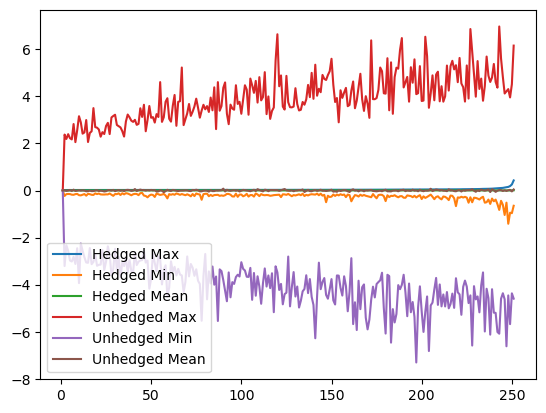

In [23]:
plt.plot(PnL.max(),label = "Hedged Max")
plt.plot(PnL.min(),label = "Hedged Min")
plt.plot(PnL.mean(),label = "Hedged Mean")
plt.plot(PnL2.max(),label = "Unhedged Max")
plt.plot(PnL2.min(),label = "Unhedged Min")
plt.plot(PnL2.mean(),label = "Unhedged Mean")
plt.legend(loc = "lower left")
plt.show()

헤지를 하지 않았을 때와 비교해, 델타헤지를 시행하였을 때의 손익의 최댓값과 최솟값의 차이가 확연하게 차이가 나는 것을 확인할 수 있습니다.

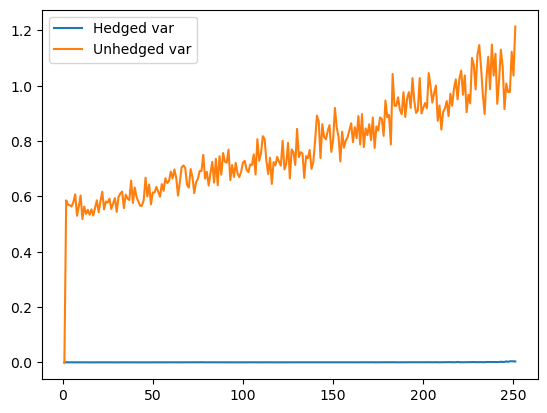

In [24]:
plt.plot(PnL.var(),label = "Hedged var")
plt.plot(PnL2.var(),label = "Unhedged var")
plt.legend(loc = "upper left")
plt.show()

분산 역시 헤지를 시행했을 때가 눈에 띄게 작은 것을 확인할 수 있습니다.

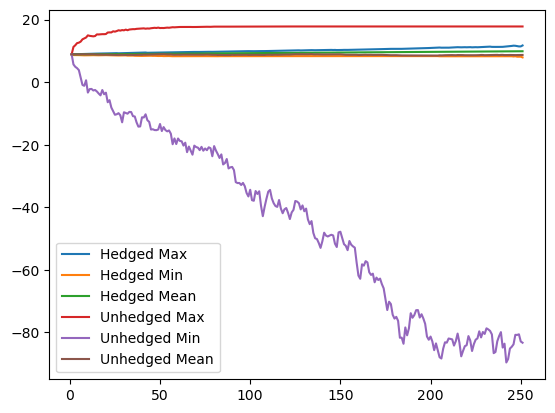

In [25]:
plt.plot(Balance.max(),label = "Hedged Max")
plt.plot(Balance.min(),label = "Hedged Min")
plt.plot(Balance.mean(),label = "Hedged Mean")
plt.plot(Balance2.max(),label = "Unhedged Max")
plt.plot(Balance2.min(),label = "Unhedged Min")
plt.plot(Balance2.mean(),label = "Unhedged Mean")
plt.legend(loc = "lower left")
plt.show()

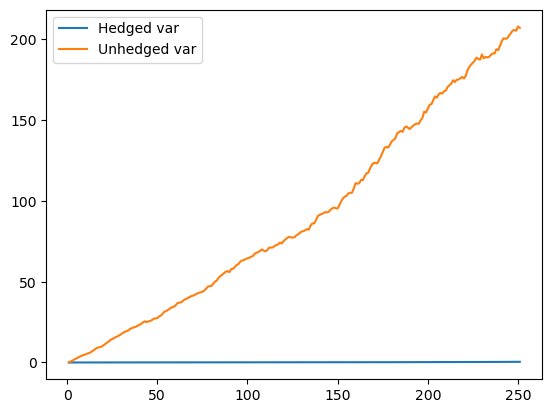

In [26]:
plt.plot(Balance.var(),label = "Hedged var")
plt.plot(Balance2.var(),label = "Unhedged var")
plt.legend(loc = "upper left")
plt.show()

잔고 역시 손익과 비슷한 양상을 보이는 것을 확인할 수 있습니다.